In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
#file_path = os.path.join(project_root, 'src', 'data_handle', 'load_clean_first_look.py')
from data_handle.data_load import ForexDataLoad
from data_handle.quick_look import ForexQuickLook
from data_handle.data_clean import ForexDataClean

from features.indicators.trend import ForexTrendIndicators
from features.indicators.momentum import ForexMomentumIndicators

from plots.plotter import ForexPlotter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ForexDataLoad(file_path = '../data/xauaud.csv')

Data loaded successfully!
Shape: (38217, 7)



In [3]:
df.data.index.name

'datetime'

DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    48 non-null     object 
 1   time    48 non-null     object 
 2   open    48 non-null     float64
 3   high    48 non-null     float64
 4   low     48 non-null     float64
 5   close   48 non-null     float64
 6   volume  48 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB
None

2. FIRST 3 ROWS:
                           date      time     open     high      low    close  \
datetime                                                                        
2025-09-03 19:00:00  2025.09.03  19:00:00  5441.48  5452.88  5439.54  5452.58   
2025-09-03 20:00:00  2025.09.03  20:00:00  5452.56  5462.86  5447.80  5461.05   
2025-09-03 21:00:00  2025.09.03  21:00:00  5461.05  5465.36  5446.87  5454.38   



<Figure size 1500x600 with 0 Axes>

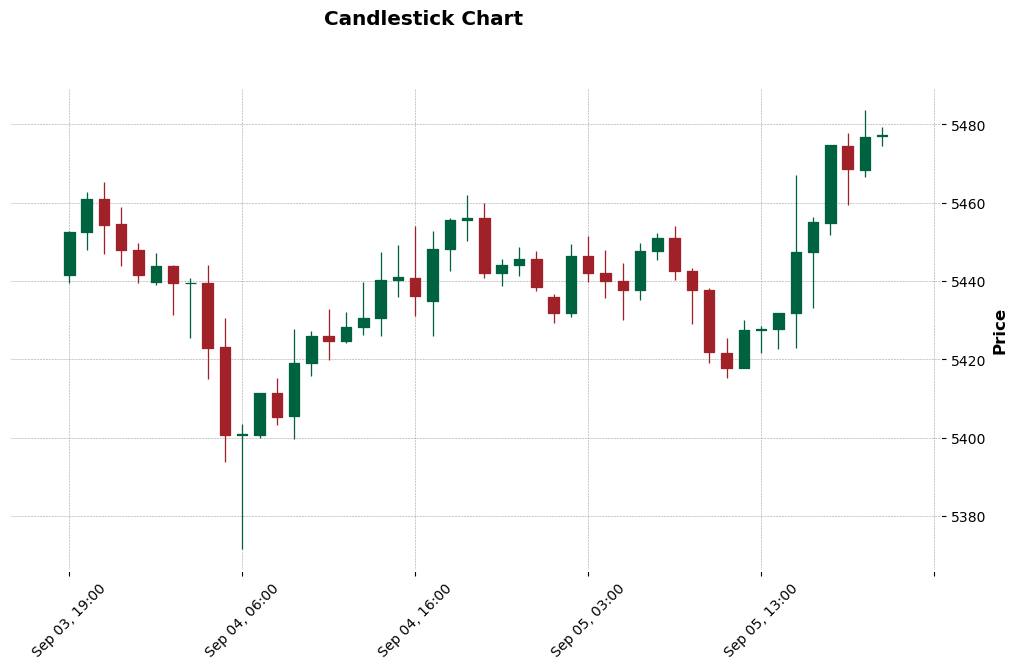

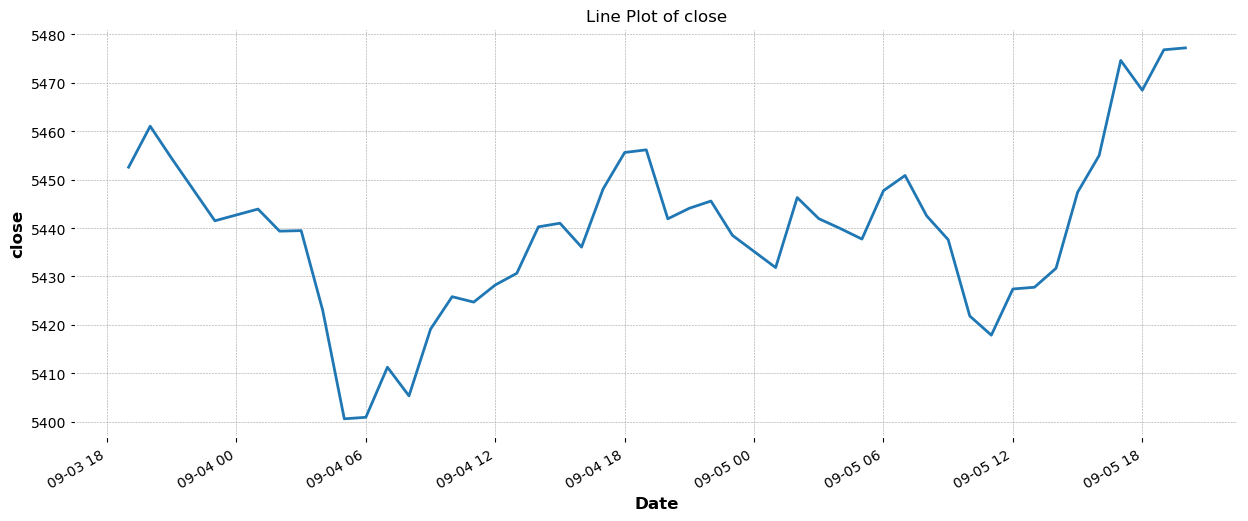

DATASET SUMMARY
Total Rows: 48
Total Columns: 7
Date Range: 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume']
Non Numeric Columns: ['date', 'time']
Missing Values: 0
Duplicates: 0
Columns: Index(['date', 'time', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Index Column: datetime


In [4]:
quick_look = ForexDataClean(df.data, periods = 48, full_look =  True)

In [5]:
cleaner = ForexDataClean(data = df.data, fast_clean = True)

Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent


In [6]:
cleaner.handle_outliers()

OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
⏭️  Skipping non-numeric column: date
⏭️  Skipping non-numeric column: time
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 766 outliers (383 low, 383 high)
Bounds: [1816.29450 - 5211.65900]
Original range: [1671.60000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 766 outliers (383 low, 383 high)
Bounds: [1817.85250 - 5218.90300]
Original range: [1672.21000 - 5477.23000]
Method: Quantile (1%-99%)
Outliers detected but not removed

,date,time,open,high,low,close,volume
datetime,,,,,,,
2017-04-24 02:00:00,2017.04.24,02:00:00,1686.03,1686.15,1681.30,1682.15,4146
2017-04-24 03:00:00,2017.04.24,03:00:00,1682.11,1691.44,1681.90,1689.13,4329
2017-04-24 04:00:00,2017.04.24,04:00:00,1689.09,1689.24,1685.89,1687.68,2609
2017-04-24 05:00:00,2017.04.24,05:00:00,1687.65,1688.84,1686.15,1688.36,1592
2017-04-24 06:00:00,2017.04.24,06:00:00,1688.34,1689.59,1686.91,1687.06,1275
...,...,...,...,...,...,...,...
2025-09-05 16:00:00,2025.09.05,16:00:00,5447.51,5456.26,5433.22,5455.01,0
2025-09-05 17:00:00,2025.09.05,17:00:00,5454.84,5474.80,5451.73,5474.64,0
2025-09-05 18:00:00,2025.09.05,18:00:00,5474.54,5477.82,5459.37,5468.49,0


In [7]:
indi = ForexTrendIndicators(cleaner.data)

TREND INDICATORS


In [8]:
indi.get_all_trend_indicators()

SMA INDICATOR
New columns added: sma_20, sma_50, sma_100, sma_200, sma_20_slope, sma_50_slope, sma_100_slope, sma_200_slope, sma_20_signal, sma_50_signal, sma_100_signal, sma_200_signal
EMA INDICATOR
New columns added: ema_20, ema_50, ema_100, ema_200, ema_20_slope, ema_50_slope, ema_100_slope, ema_200_slope, ema_20_signal, ema_50_signal, ema_100_signal, ema_200_signal
MACD INDICATOR
New columns added: macd_line, macd_signal, macd_histogram, macd_cross, macd_above_zero, macd_signal_above_zero, macd_hist_change
ADX INDICATOR
New columns added: adx, plus_di, minus_di, adx_trend_strength, adx_strong_trend, di_crossover, trend_direction
PARABOLIC SAR INDICATOR
New columns added: parabolic_sar, sar_signal, sar_above_price, sar_trend_change
TREND CONFIRMATION
New columns added: price_above_sma50, price_above_sma200, golden_cross, death_cross, multi_tf_bullish, multi_tf_bearish
TREND STRENGTH
10.0


,date,time,open,high,low,close,volume,sma_20,sma_20_slope,sma_50,...,adx_trend_strength,adx_strong_trend,di_crossover,trend_direction,parabolic_sar,sar_signal,sar_above_price,sar_trend_change,multi_tf_bullish,multi_tf_bearish
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 02:00:00,2017.04.24,02:00:00,1686.03,1686.15,1681.30,1682.15,4146,NaN,NaN,NaN,...,NaN,0,-1,neutral,NaN,-1,0,0.0,0,0
2017-04-24 03:00:00,2017.04.24,03:00:00,1682.11,1691.44,1681.90,1689.13,4329,NaN,NaN,NaN,...,NaN,0,-1,neutral,1681.300000,1,0,2.0,0,0
2017-04-24 04:00:00,2017.04.24,04:00:00,1689.09,1689.24,1685.89,1687.68,2609,NaN,NaN,NaN,...,NaN,0,-1,neutral,1681.502800,1,0,0.0,0,0
2017-04-24 05:00:00,2017.04.24,05:00:00,1687.65,1688.84,1686.15,1688.36,1592,NaN,NaN,NaN,...,NaN,0,-1,neutral,1681.701544,1,0,0.0,0,0
2017-04-24 06:00:00,2017.04.24,06:00:00,1688.34,1689.59,1686.91,1687.06,1275,NaN,NaN,NaN,...,NaN,0,-1,neutral,1681.896313,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05 16:00:00,2025.09.05,16:00:00,5447.51,5456.26,5433.22,5455.01,0,5438.7805,-0.0580,5435.8618,...,weak,0,1,uptrend,5416.314800,1,0,0.0,1,0
2025-09-05 17:00:00,2025.09.05,17:00:00,5454.84,5474.80,5451.73,5474.64,0,5440.4165,1.6360,5436.9340,...,weak,0,1,uptrend,5417.328904,1,0,0.0,1,0
2025-09-05 18:00:00,2025.09.05,18:00:00,5474.54,5477.82,5459.37,5468.49,0,5441.6360,1.2195,5437.7528,...,weak,0,1,uptrend,5419.627748,1,0,0.0,1,0


In [9]:
indi.data.shape

(38216, 39)

In [10]:
indi.data.index.name 

'datetime'

In [11]:
cleaner = ForexDataClean(data = indi.data, fast_clean = True)

Keep = first and subset = None
Removed 0 duplicate entries
Found 688 missing values
 dropped: 688 missing values .
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent


In [12]:
df = cleaner.data

In [13]:
df

,date,time,open,high,low,close,volume,sma_20,sma_20_slope,sma_50,...,adx_trend_strength,adx_strong_trend,di_crossover,trend_direction,parabolic_sar,sar_signal,sar_above_price,sar_trend_change,multi_tf_bullish,multi_tf_bearish
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-25 08:00:00,2019.03.25,08:00:00,1858.30,1859.15,1858.02,1858.37,0,1853.9015,0.4785,1847.5000,...,strong,1,1,uptrend,1856.309360,1,0,0.0,1,0
2019-03-25 09:00:00,2019.03.25,09:00:00,1858.37,1859.40,1857.13,1857.96,0,1854.2200,0.3185,1847.8336,...,strong,1,1,uptrend,1861.030000,-1,1,-2.0,1,0
2019-03-25 10:00:00,2019.03.25,10:00:00,1857.96,1860.14,1856.84,1858.41,0,1854.6340,0.4140,1848.1106,...,strong,1,1,uptrend,1860.952000,-1,1,0.0,1,0
2019-03-25 11:00:00,2019.03.25,11:00:00,1858.41,1858.52,1856.21,1858.28,0,1854.9475,0.3135,1848.3650,...,strong,1,1,uptrend,1860.787520,-1,1,0.0,1,0
2019-03-25 12:00:00,2019.03.25,12:00:00,1858.28,1858.31,1856.01,1857.53,0,1855.4010,0.4535,1848.6364,...,strong,1,1,uptrend,1860.512869,-1,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05 16:00:00,2025.09.05,16:00:00,5447.51,5456.26,5433.22,5455.01,0,5438.7805,-0.0580,5435.8618,...,weak,0,1,uptrend,5416.314800,1,0,0.0,1,0
2025-09-05 17:00:00,2025.09.05,17:00:00,5454.84,5474.80,5451.73,5474.64,0,5440.4165,1.6360,5436.9340,...,weak,0,1,uptrend,5417.328904,1,0,0.0,1,0
2025-09-05 18:00:00,2025.09.05,18:00:00,5474.54,5477.82,5459.37,5468.49,0,5441.6360,1.2195,5437.7528,...,weak,0,1,uptrend,5419.627748,1,0,0.0,1,0


In [14]:
df.shape

(38116, 39)

In [15]:
indi2 = ForexMomentumIndicators(data = df)

MOMENTUM INDICATORS


In [16]:
indi2.get_all_momentum_indicators()

RSI INDICATOR
New columns added: ['rsi_14', 'rsi_14_overbought', 'rsi_14_oversold', 'rsi_14_signal', 'rsi_14_trend', 'rsi_21', 'rsi_21_overbought', 'rsi_21_oversold', 'rsi_21_signal', 'rsi_21_trend', 'rsi_28', 'rsi_28_overbought', 'rsi_28_oversold', 'rsi_28_signal', 'rsi_28_trend']
STOCHASTIC OSCILLATOR
New columns added: stoch_slowk, stoch_slowd, stoch_crossover, stoch_overbought, stoch_oversold, stoch_signal
WILLIAMS %R INDICATOR
New columns added: williams_r, willr_overbought, willr_oversold, willr_signal, willr_trend
CCI INDICATOR
New columns added: cci, cci_overbought, cci_oversold, cci_signal, cci_trend
MOMENTUM INDICATOR
New columns added: momentum_10, momentum_10_signal, momentum_10_strength, momentum_10_trend, momentum_14, momentum_14_signal, momentum_14_strength, momentum_14_trend, momentum_20, momentum_20_signal, momentum_20_strength, momentum_20_trend
MOMENTUM CONFIRMATION
New columns added: momentum_bullish_confirmation, momentum_bearish_confirmation, price_rsi_divergence


,date,time,open,high,low,close,volume,sma_20,sma_20_slope,sma_50,...,momentum_14_signal,momentum_14_strength,momentum_14_trend,momentum_20,momentum_20_signal,momentum_20_strength,momentum_20_trend,momentum_bullish_confirmation,momentum_bearish_confirmation,price_rsi_divergence
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-25 08:00:00,2019.03.25,08:00:00,1858.30,1859.15,1858.02,1858.37,0,1853.9015,0.4785,1847.5000,...,-1,NaN,NaN,NaN,-1,NaN,NaN,0,0,0
2019-03-25 09:00:00,2019.03.25,09:00:00,1858.37,1859.40,1857.13,1857.96,0,1854.2200,0.3185,1847.8336,...,-1,NaN,NaN,NaN,-1,NaN,NaN,0,0,0
2019-03-25 10:00:00,2019.03.25,10:00:00,1857.96,1860.14,1856.84,1858.41,0,1854.6340,0.4140,1848.1106,...,-1,NaN,NaN,NaN,-1,NaN,NaN,0,0,0
2019-03-25 11:00:00,2019.03.25,11:00:00,1858.41,1858.52,1856.21,1858.28,0,1854.9475,0.3135,1848.3650,...,-1,NaN,NaN,NaN,-1,NaN,NaN,0,0,0
2019-03-25 12:00:00,2019.03.25,12:00:00,1858.28,1858.31,1856.01,1857.53,0,1855.4010,0.4535,1848.6364,...,-1,NaN,NaN,NaN,-1,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05 16:00:00,2025.09.05,16:00:00,5447.51,5456.26,5433.22,5455.01,0,5438.7805,-0.0580,5435.8618,...,1,8.70,-6.86,-1.16,-1,1.16,7.06,1,0,0
2025-09-05 17:00:00,2025.09.05,17:00:00,5454.84,5474.80,5451.73,5474.64,0,5440.4165,1.6360,5436.9340,...,1,32.69,23.99,32.72,1,32.72,33.88,1,0,0
2025-09-05 18:00:00,2025.09.05,18:00:00,5474.54,5477.82,5459.37,5468.49,0,5441.6360,1.2195,5437.7528,...,1,28.58,-4.11,24.39,1,24.39,-8.33,1,0,0


In [17]:
indi2.get_momentum_score()

MOMENTUM SCORE
Current momentum score: 100.0
Strong Bullish Momentum


100.0

In [18]:
indi2 = ForexDataClean(data = indi2.data, fast_clean = True)

Keep = first and subset = None
Removed 0 duplicate entries
Found 364 missing values
 dropped: 364 missing values .
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent


In [19]:
indi2.data.shape

(38087, 85)

In [20]:
indi2.handle_outliers()

OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
⏭️  Skipping non-numeric column: date
⏭️  Skipping non-numeric column: time
open: Found 762 outliers (381 low, 381 high)
Bounds: [1819.77580 - 5219.06380]
Original range: [1769.83000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 762 outliers (381 low, 381 high)
Bounds: [1821.02720 - 5224.96560]
Original range: [1771.54000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 762 outliers (381 low, 381 high)
Bounds: [1818.51440 - 5211.71100]
Original range: [1769.07000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 762 outliers (381 low, 381 high)
Bounds: [1819.73860 - 5219.07080]
Original range: [1769.83000 - 5477.23000]
Method: Quantile (1%-99%)
Outliers detected but not removed

,date,time,open,high,low,close,volume,sma_20,sma_20_slope,sma_50,...,momentum_14_signal,momentum_14_strength,momentum_14_trend,momentum_20,momentum_20_signal,momentum_20_strength,momentum_20_trend,momentum_bullish_confirmation,momentum_bearish_confirmation,price_rsi_divergence
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-26 14:00:00,2019.03.26,14:00:00,1844.01,1844.79,1842.24,1842.83,0,1853.4945,-0.7510,1854.3386,...,-1,14.10,1.35,-15.02,-1,15.02,-0.21,0,1,0
2019-03-26 15:00:00,2019.03.26,15:00:00,1842.83,1846.90,1842.11,1846.40,0,1852.9260,-0.5685,1854.2906,...,-1,12.58,1.52,-11.37,-1,11.37,3.65,0,1,0
2019-03-26 16:00:00,2019.03.26,16:00:00,1846.40,1849.05,1842.08,1842.84,0,1852.1220,-0.8040,1854.1156,...,-1,13.85,-1.27,-16.08,-1,16.08,-4.71,0,1,0
2019-03-26 17:00:00,2019.03.26,17:00:00,1842.79,1845.72,1842.69,1842.88,0,1851.2710,-0.8510,1853.9706,...,-1,12.34,1.51,-17.02,-1,17.02,-0.94,0,1,0
2019-03-26 18:00:00,2019.03.26,18:00:00,1842.90,1843.44,1839.61,1841.42,0,1850.4050,-0.8660,1853.7588,...,-1,15.39,-3.05,-17.32,-1,17.32,-0.30,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05 16:00:00,2025.09.05,16:00:00,5447.51,5456.26,5433.22,5455.01,0,5438.7805,-0.0580,5435.8618,...,1,8.70,-6.86,-1.16,-1,1.16,7.06,1,0,0
2025-09-05 17:00:00,2025.09.05,17:00:00,5454.84,5474.80,5451.73,5474.64,0,5440.4165,1.6360,5436.9340,...,1,32.69,23.99,32.72,1,32.72,33.88,1,0,0
2025-09-05 18:00:00,2025.09.05,18:00:00,5474.54,5477.82,5459.37,5468.49,0,5441.6360,1.2195,5437.7528,...,1,28.58,-4.11,24.39,1,24.39,-8.33,1,0,0


In [21]:
df = indi2.data

DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   date                           48 non-null     object  
 1   time                           48 non-null     object  
 2   open                           48 non-null     float64 
 3   high                           48 non-null     float64 
 4   low                            48 non-null     float64 
 5   close                          48 non-null     float64 
 6   volume                         48 non-null     int64   
 7   sma_20                         48 non-null     float64 
 8   sma_20_slope                   48 non-null     float64 
 9   sma_50                         48 non-null     float64 
 10  sma_50_slope                   48 non-null     float64 
 11  sma_100                  

<Figure size 1500x600 with 0 Axes>

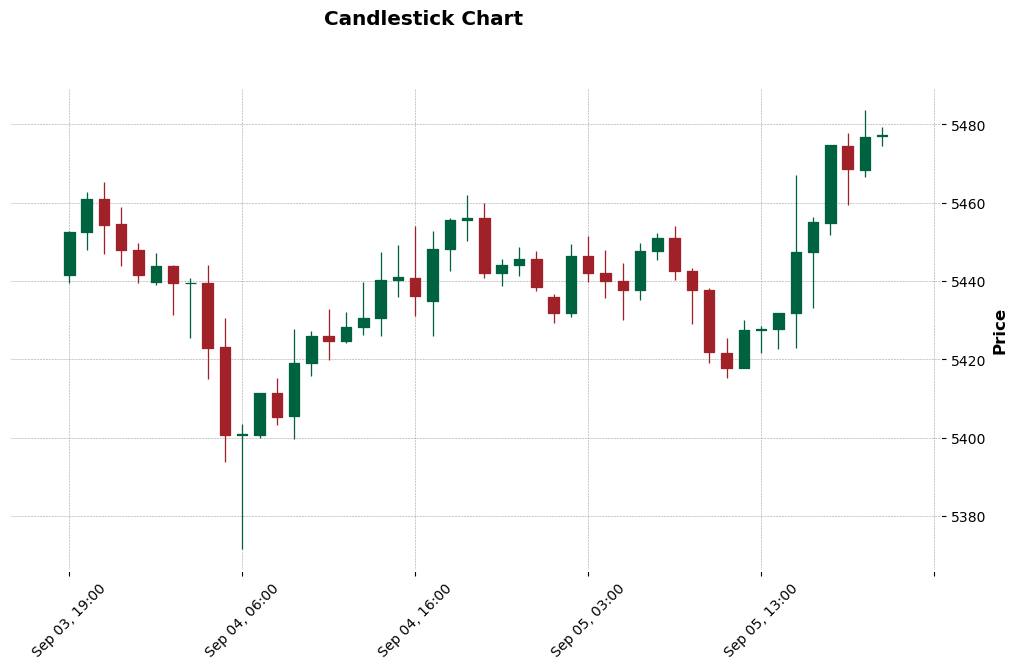

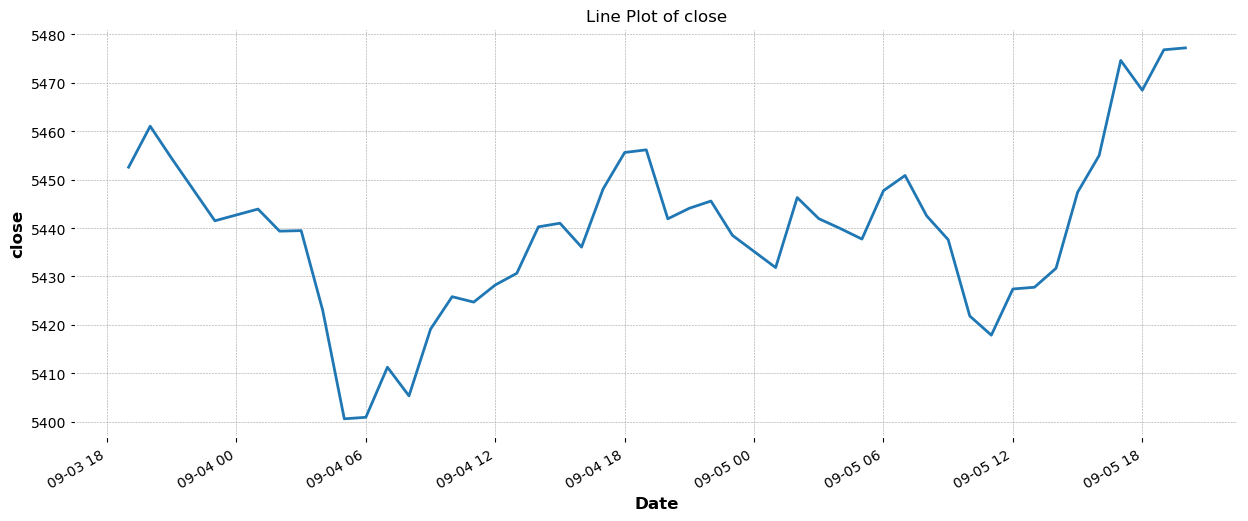

DATASET SUMMARY
Total Rows: 48
Total Columns: 85
Date Range: 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume', 'sma_20', 'sma_20_slope', 'sma_50', 'sma_50_slope', 'sma_100', 'sma_100_slope', 'sma_100_signal', 'ema_12', 'ema_26', 'ema_50', 'ema_50_signal', 'ema_50_slope', 'macd_line', 'macd_signal', 'macd_histogram', 'macd_cross', 'macd_above_zero', 'macd_signal_above_zero', 'macd_hist_change', 'adx', 'plus_di', 'minus_di', 'adx_strong_trend', 'di_crossover', 'parabolic_sar', 'sar_signal', 'sar_above_price', 'sar_trend_change', 'multi_tf_bullish', 'multi_tf_bearish', 'rsi_14', 'rsi_14_overbought', 'rsi_14_oversold', 'rsi_14_signal', 'rsi_14_trend', 'rsi_21', 'rsi_21_overbought', 'rsi_21_oversold', 'rsi_21_signal', 'rsi_21_trend', 'rsi_28', 'rsi_28_overbought', 'rsi_28_oversold', 'rsi_28_signal', 'rsi_28_trend', 'stoch_slowk', 'stoch_slowd', 'stoch_crossover', 'stoch_overbought', 'stoch_oversold', 'stoch_signal', 'williams_r', 'willr_o

In [22]:
quick = ForexDataClean(data = df, periods = 48, full_look = True)

In [24]:
df.index.name

'datetime'